# **Task 2) Prediction using Decision Tree Algorithm ::**

---
# **Author : Ayush Shende**

> *LetsGrowMore (LGM)*




# **importing required library**

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# **loading Iris Data set**

In [2]:
df = pd.read_csv("/content/Iris .csv") 

# **Getting numerical Overview Over data **

In [3]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# **Checking Null VAlues**


In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# **Saperating X and Y**

In [7]:
x = df.iloc[:,1:-1] 
y = df.iloc[:,-1]

print("X === \n{} \n\n Y== \n{}".format(x,y))
print("\n\nUnique values on Y  == {}".format(y.unique()))

X === 
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns] 

 Y== 
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virgini

# ***Visualizing Data using Box plot Graph ***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


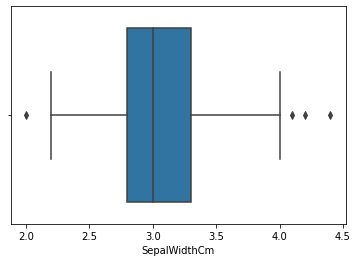

In [35]:
sb.boxplot(df["SepalWidthCm"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


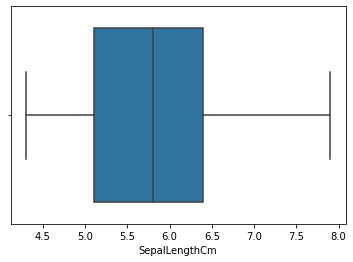

In [36]:
sb.boxplot(df["SepalLengthCm"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


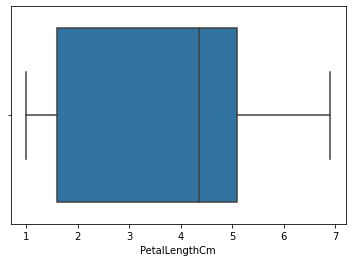

In [38]:
sb.boxplot(df["PetalLengthCm"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


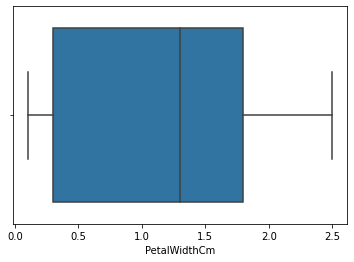

In [39]:
sb.boxplot(df["PetalWidthCm"])
plt.show()

# ***Spliting Given Data in to Train And Test***

In [82]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                 test_size = 0.3,
                                                 random_state=2021)

# **Viewing X , Y (Train & Test) Data **

In [83]:
print(x_train)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
83             6.0           2.7            5.1           1.6
149            5.9           3.0            5.1           1.8
136            6.3           3.4            5.6           2.4
59             5.2           2.7            3.9           1.4
88             5.6           3.0            4.1           1.3
..             ...           ...            ...           ...
109            7.2           3.6            6.1           2.5
128            6.4           2.8            5.6           2.1
57             4.9           2.4            3.3           1.0
85             6.0           3.4            4.5           1.6
116            6.5           3.0            5.5           1.8

[105 rows x 4 columns]


In [84]:
print(x_test.head())

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
42            4.4           3.2            1.3           0.2
22            4.6           3.6            1.0           0.2
80            5.5           2.4            3.8           1.1
13            4.3           3.0            1.1           0.1
28            5.2           3.4            1.4           0.2


In [85]:
print(y_train.head())

83     Iris-versicolor
149     Iris-virginica
136     Iris-virginica
59     Iris-versicolor
88     Iris-versicolor
Name: Species, dtype: object


In [86]:
print(y_train.head())

83     Iris-versicolor
149     Iris-virginica
136     Iris-virginica
59     Iris-versicolor
88     Iris-versicolor
Name: Species, dtype: object


In [87]:
print(x_test.shape[0])

45


# Implementing Decision **tree**

In [88]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier(random_state= 2021)
DTC.fit(x_train,y_train)
print("//**** We have created the Dicision tree Classifier ****\\\\")

//**** We have created the Dicision tree Classifier ****\\


# **Predicting data from the modal we  built**

In [95]:
y_pred = DTC.predict(x_test).reshape(-1,1)
y_pred[:6]

array([['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa']], dtype=object)

# ***Calculating The acuracy and Getting Confusion Matrix***

In [90]:
from sklearn.metrics import accuracy_score,confusion_matrix

print("The Accuract For the Model We Created  \n\n ===>>{}".format(accuracy_score(y_pred,y_test)))
print("\n\nConfusion Matrix for the modele we Created  ==>> \n\n{}".format(confusion_matrix(y_pred,y_test)))

The Accuract For the Model We Created  

 ===>>0.9333333333333333


Confusion Matrix for the modele we Created  ==>> 

[[17  0  0]
 [ 0 16  3]
 [ 0  0  9]]
